[![Colab Badge](https://img.shields.io/badge/Open_in_Colab-blue?style=for-the-badge)][colab-link]
<a href="javascript:void(0);" onclick="openJupyterWidget('https://github.com/nmfs-opensci/nmfshackdays-2025/blob/main/topics-2025/2025-02-14-earthdata/4-data-cubes.ipynb');">
    <img src="https://img.shields.io/badge/Open_in_JupyterHub-orange?style=for-the-badge" alt="JupyterHub Badge">
</a> [![Download Badge](https://img.shields.io/badge/Download-grey?style=for-the-badge)][download-link]

[download-link]: https://nmfs-opensci.github.io/NMFSHackDays-2025/topics-2025/2025-02-14-earthdata/4-data-cubes.ipynb
[colab-link]: https://colab.research.google.com/github/nmfs-opensci/nmfshackdays-2025/blob/main/topics-2025/2025-02-14-earthdata/4-data-cubes.ipynb
[jupyter-link]: https://nmfs-openscapes.2i2c.cloud/hub/user-redirect/lab?fromURL=https://raw.githubusercontent.com/nmfs-opensci/nmfshackdays-2025/main/topics-2025/2025-02-14-earthdata/4-data-cubes.ipynb

>📘 Learning Objectives
>
> 1. Intro to some `xarray` tools for data cubes
> 2. Point you to resources on line

## Summary

Once we have an `xarray` DataArray, there are many things we can do with it like aggregation, sampling, means and interpolation. See [this tutorial](https://earth-env-data-science.github.io/lectures/xarray/xarray-part2.html) for examples. See the `xarray` [gallery](https://docs.xarray.dev/en/latest/gallery.html) in the documentation.

We will use the [GHRSST Level 4 AVHRR_OI Global Blended Sea Surface Temperature Analysis](https://cmr.earthdata.nasa.gov/search/concepts/C2036881712-POCLOUD.html) data from NCEI. It is lower resolution than the MUR data and will load faster. Also keep in mind that we are on a JupyterHub on Azure while the NASA data is on AWS us-west-2. This means we have to do data access via `https` and not direct access via `S3` and our data access is much slower.

#### For those not working in the JupyterHub

Create a code cell and run `pip install earthaccess`.

### Import Required Packages

In [1]:
# Suppress warnings
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')
from pprint import pprint

import earthaccess
import xarray as xr

## Create our data cube

1) Authenticate

In [25]:
auth = earthaccess.login()
# are we authenticated?
if not auth.authenticated:
    # ask for credentials and persist them in a .netrc file
    auth.login(strategy="interactive", persist=True)

2) Get a vector of urls to our nc files

Position of stations

14.616 -17.631, 
14.615 -17.630, 
14.618 -17.628, 
14.618 -17.628, 
14.742 -17.636, 
14.742 -17.636

In [53]:
#short_name = 'AVHRR_OI-NCEI-L4-GLOB-v2.1'; version = "2.1"
#short_name = 'REYNOLDS_NCDC_L4_MONTHLY_V5'
short_name = 'AVHRR_OI-NCEI-L4-GLOB-v2.0'; version = 2.0

date_range = ("1981-09-01", "2023-12-31")
lat_min = 9
lat_max = 19
lon_min = -23
lon_max = -12

results = earthaccess.search_data(
    short_name = short_name,
    version = version,
    temporal = date_range,
    cloud_hosted=True
)
len(results)

14096

3) Create our data cube and save

This will take a few minutes to run. But to speed things up, I have uploaded `littlecube.nc` to the website.

In [ ]:
fileset = earthaccess.open(results)
ds = xr.open_mfdataset(fileset)
#ds = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max)) 

QUEUEING TASKS | :   0%|          | 0/14096 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/14096 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/14096 [00:00<?, ?it/s]

In [ ]:
ds.data_vars

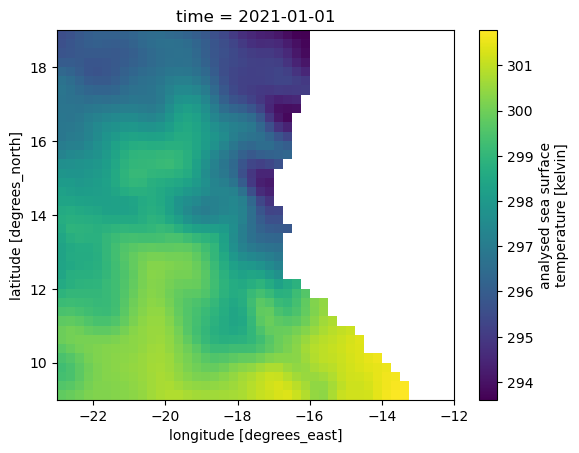

In [28]:
ds.analysed_sst[0].plot()

In [29]:
ds.time[0]

<xarray.DataArray 'time' ()> Size: 8B
array('2021-01-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2021-01-01
Attributes:
    long_name:      reference time of sst field
    standard_name:  time
    axis:           T
    comment:        Nominal time because observations are from different sour...

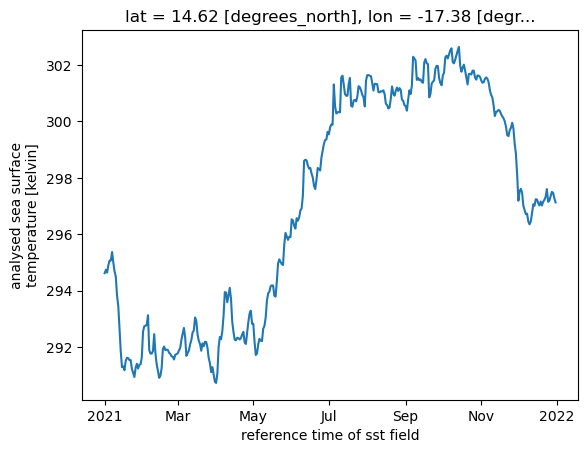

In [35]:
ds.analysed_sst.sel(lon=-17.5, lat=14.5, method = 'nearest').plot()
#ds.analysed_sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max)).plot()

In [36]:
ds

<xarray.Dataset> Size: 11MB
Dimensions:           (time: 365, lat: 40, nv: 2, lon: 44)
Coordinates:
  * lat               (lat) float32 160B 9.125 9.375 9.625 ... 18.38 18.62 18.88
  * lon               (lon) float32 176B -22.88 -22.62 -22.38 ... -12.38 -12.12
  * time              (time) datetime64[ns] 3kB 2021-01-01 ... 2021-12-31
Dimensions without coordinates: nv
Data variables:
    lat_bnds          (time, lat, nv) float32 117kB dask.array<chunksize=(1, 40, 2), meta=np.ndarray>
    lon_bnds          (time, lon, nv) float32 128kB dask.array<chunksize=(1, 44, 2), meta=np.ndarray>
    analysed_sst      (time, lat, lon) float32 3MB dask.array<chunksize=(1, 40, 44), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 3MB dask.array<chunksize=(1, 40, 44), meta=np.ndarray>
    mask              (time, lat, lon) float32 3MB dask.array<chunksize=(1, 40, 44), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 3MB dask.array<chunksize=(1, 40, 44), meta=np.ndarray>
Attributes: (12/46)
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    id:                         NCEI-L4_GHRSST-SSTblend-AVHRR_OI
    references:                 Reynolds, et al.(2009) What is New in Version...
    institution:                NOAA/NESDIS/NCEI
    creator_name:               NCEI Products and Services
    ...                         ...
    metadata_link:              http://podaac.jpl.nasa.gov/ws/metadata/datase...
    keywords:                   Oceans>Ocean Temperature>Sea Surface Temperature
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    standard_name_vocabulary:   CF Standard Name Table v29
    processing_level:           L4
    cdm_data_type:              Grid

In [17]:
ds.analysed_sst.groupby?

Signature:
ds.analysed_sst.groupby(
    group: 'GroupInput' = None,
    *,
    squeeze: 'Literal[False]' = False,
    restore_coord_dims: 'bool' = False,
    eagerly_compute_group: 'bool' = True,
    **groupers: 'Grouper',
) -> 'DataArrayGroupBy'
Docstring:
Returns a DataArrayGroupBy object for performing grouped operations.

Parameters
----------
group : str or DataArray or IndexVariable or sequence of hashable or mapping of hashable to Grouper
    Array whose unique values should be used to group this array. If a
    Hashable, must be the name of a coordinate contained in this dataarray. If a dictionary,
    must map an existing variable name to a :py:class:`Grouper` instance.
squeeze : False
    This argument is deprecated.
restore_coord_dims : bool, default: False
    If True, also restore the dimension order of multi-dimensional
    coordinates.
eagerly_compute_group: bool
    Whether to eagerly compute ``group`` when it is a chunked array.
    This option is to maintain backwards

In [37]:
ds.time.dt

In [38]:
ds.time.dt.month

<xarray.DataArray 'month' (time: 365)> Size: 3kB
array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12])
Coordinates:
  * time     (time) datetime64[ns] 3kB 2021-01-01 2021-01-02 ... 2021-12-31
Attributes:
    long_name:      reference time of sst field
    standard_name:  time
    axis:           T
    comment:        Nominal time because observations are from different sour...

In [39]:
#gb = ds.analysed_sst.groupby(ds.time.dt.month)
#gb

#identally...
gb = ds.analysed_sst.groupby('time.month')
gb

<DataArrayGroupBy, grouped over 1 grouper(s), 12 groups in total:
    'month': 12/12 groups present with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12>

In [40]:
for group_name, group_da in gb:
    # stop iterating after the first loop
    break 
print(group_name)
group_da

1


<xarray.DataArray 'analysed_sst' (time: 31, lat: 40, lon: 44)> Size: 218kB
dask.array<getitem, shape=(31, 40, 44), dtype=float32, chunksize=(1, 40, 44), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 160B 9.125 9.375 9.625 9.875 ... 18.38 18.62 18.88
  * lon      (lon) float32 176B -22.88 -22.62 -22.38 ... -12.62 -12.38 -12.12
  * time     (time) datetime64[ns] 248B 2021-01-01 2021-01-02 ... 2021-01-31
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_temperature
    units:          kelvin
    valid_min:      -300
    valid_max:      4500
    source:         UNKNOWN,ICOADS SHIPS,ICOADS BUOYS,ICOADS argos,MMAB_50KM-...
    comment:        Single-sensor Pathfinder 5.0/5.1 AVHRR SSTs used until 20...

In [26]:
gb.map?

Signature:
gb.map(
    func: 'Callable[..., DataArray]',
    args: 'tuple[Any, ...]' = (),
    shortcut: 'bool | None' = None,
    **kwargs: 'Any',
) -> 'DataArray'
Docstring:
Apply a function to each array in the group and concatenate them
together into a new array.

`func` is called like `func(ar, *args, **kwargs)` for each array `ar`
in this group.

Apply uses heuristics (like `pandas.GroupBy.apply`) to figure out how
to stack together the array. The rule is:

1. If the dimension along which the group coordinate is defined is
   still in the first grouped array after applying `func`, then stack
   over this dimension.
2. Otherwise, stack over the new dimension given by name of this
   grouping (the argument to the `groupby` function).

Parameters
----------
func : callable
    Callable to apply to each array.
shortcut : bool, optional
    Whether or not to shortcut evaluation under the assumptions that:

    (1) The action of `func` does not depend on any of the array
        metada

In [41]:
import numpy as np
from matplotlib import pyplot as plt
gb.map(np.mean)

<xarray.DataArray 'analysed_sst' (month: 12)> Size: 48B
dask.array<concatenate, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [42]:
## create a function to take means over time?
#def time_mean(a):
#    return a.mean(dim='time')

#gb.apply(time_mean)

## alternatively
#this does the same thing as the previous cell
sst_mm = gb.mean(dim='time')
sst_mm

<xarray.DataArray 'analysed_sst' (month: 12, lat: 40, lon: 44)> Size: 84kB
dask.array<transpose, shape=(12, 40, 44), dtype=float32, chunksize=(1, 40, 44), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 160B 9.125 9.375 9.625 9.875 ... 18.38 18.62 18.88
  * lon      (lon) float32 176B -22.88 -22.62 -22.38 ... -12.62 -12.38 -12.12
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_temperature
    units:          kelvin
    valid_min:      -300
    valid_max:      4500
    source:         UNKNOWN,ICOADS SHIPS,ICOADS BUOYS,ICOADS argos,MMAB_50KM-...
    comment:        Single-sensor Pathfinder 5.0/5.1 AVHRR SSTs used until 20...

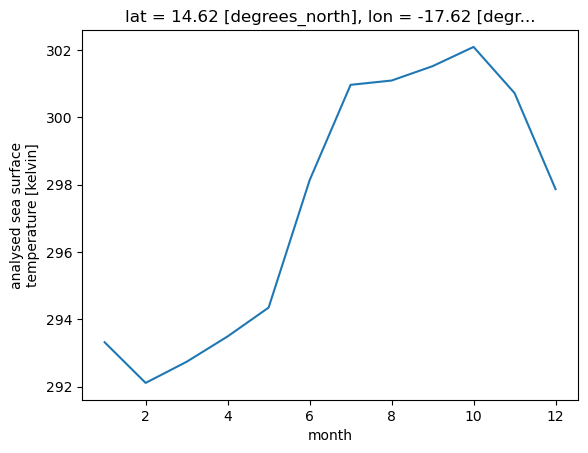

In [43]:
sst_mm.sel(lon=-17.6, lat=14.6, method = 'nearest').plot()

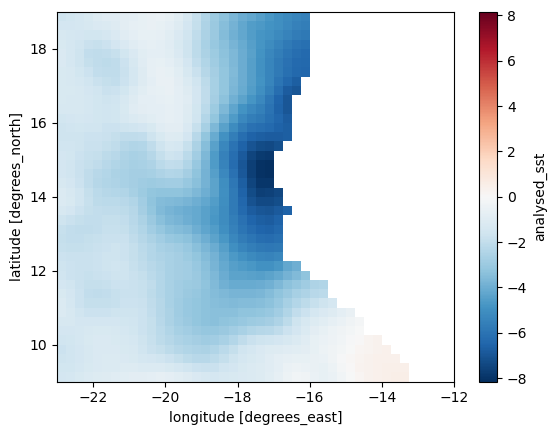

In [44]:
#_Difference between January and July Climatology_
(sst_mm.sel(month=1) - sst_mm.sel(month=7)).plot()

In [45]:
gb = ds.groupby('time.month')
ds_anom = gb - gb.mean(dim='time')
ds_anom

<xarray.Dataset> Size: 11MB
Dimensions:           (lat: 40, lon: 44, time: 365, nv: 2)
Coordinates:
  * lat               (lat) float32 160B 9.125 9.375 9.625 ... 18.38 18.62 18.88
  * lon               (lon) float32 176B -22.88 -22.62 -22.38 ... -12.38 -12.12
  * time              (time) datetime64[ns] 3kB 2021-01-01 ... 2021-12-31
    month             (time) int64 3kB 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12
Dimensions without coordinates: nv
Data variables:
    lat_bnds          (time, lat, nv) float32 117kB dask.array<chunksize=(1, 40, 2), meta=np.ndarray>
    lon_bnds          (time, lon, nv) float32 128kB dask.array<chunksize=(1, 44, 2), meta=np.ndarray>
    analysed_sst      (time, lat, lon) float32 3MB dask.array<chunksize=(1, 40, 44), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 3MB dask.array<chunksize=(1, 40, 44), meta=np.ndarray>
    mask              (time, lat, lon) float32 3MB dask.array<chunksize=(1, 40, 44), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 3MB dask.array<chunksize=(1, 40, 44), meta=np.ndarray>

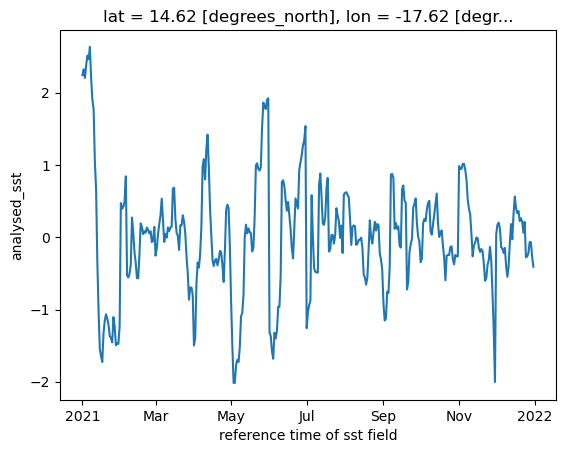

In [46]:
ds_anom.analysed_sst.sel(lon=-17.6, lat=14.6, method = 'nearest').plot()

In [40]:
ds_anom.time

<xarray.DataArray 'time' (time: 1095)> Size: 9kB
array(['2021-01-01T00:00:00.000000000', '2021-01-02T00:00:00.000000000',
       '2021-01-03T00:00:00.000000000', ..., '2023-12-29T00:00:00.000000000',
       '2023-12-30T00:00:00.000000000', '2023-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 9kB 2021-01-01 2021-01-02 ... 2023-12-31
    month    (time) int64 9kB 1 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12
Attributes:
    long_name:      reference time of sst field
    standard_name:  time
    axis:           T
    comment:        Nominal time because observations are from different sour...

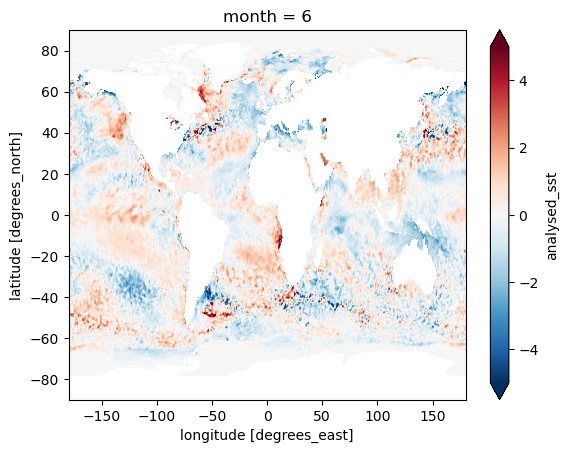

In [42]:
#_Difference between Jun. 1 2021 and Jun. 1 2022_
(ds_anom.sel(time='2021-06-01') - ds_anom.sel(time='2022-06-01')).analysed_sst.plot(vmax = 5)

In [44]:
ds_anom_resample = ds_anom.resample(time='1Y').mean(dim='time')
ds_anom_resample

<xarray.Dataset> Size: 50MB
Dimensions:           (time: 3, lat: 720, nv: 2, lon: 1440)
Coordinates:
  * lat               (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon               (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
  * time              (time) datetime64[ns] 24B 2021-12-31 2022-12-31 2023-12-31
Dimensions without coordinates: nv
Data variables:
    lat_bnds          (time, lat, nv) float32 17kB dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bnds          (time, lon, nv) float32 35kB dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    analysed_sst      (time, lat, lon) float32 12MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 12MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    mask              (time, lat, lon) float32 12MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 12MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>

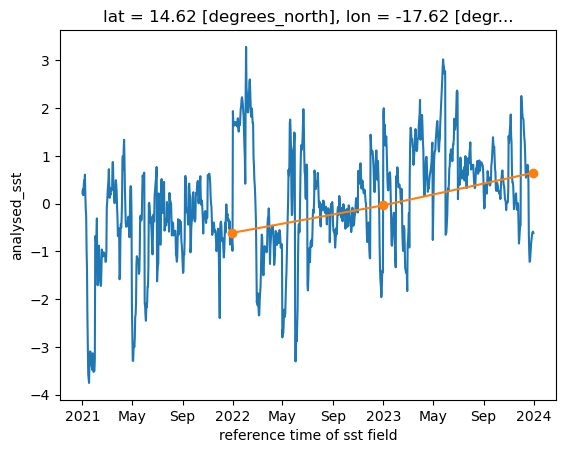

In [46]:
ds_anom.analysed_sst.sel(lon=-17.6, lat=14.5, method = 'nearest').plot()
#ds_anom_resample.analysed_sst.sel(lon=-17.6, lat=14.5, method = 'nearest').plot(marker='o')

In [23]:
dc = ds.sel(lat=slice(min_lat, max_lat), lon=slice(min_lon, max_lon))

In [10]:
#dc.to_netcdf("dakar.nc")
dc = xr.open_dataset('/home/jovyan/Dakar-Humpback/dakar.nc')
dc

<xarray.Dataset> Size: 32MB
Dimensions:           (time: 1095, lat: 40, nv: 2, lon: 44)
Coordinates:
  * lat               (lat) float32 160B 9.125 9.375 9.625 ... 18.38 18.62 18.88
  * lon               (lon) float32 176B -22.88 -22.62 -22.38 ... -12.38 -12.12
  * time              (time) datetime64[ns] 9kB 2021-01-01 ... 2023-12-31
Dimensions without coordinates: nv
Data variables:
    lat_bnds          (time, lat, nv) float32 350kB ...
    lon_bnds          (time, lon, nv) float32 385kB ...
    analysed_sst      (time, lat, lon) float32 8MB ...
    analysis_error    (time, lat, lon) float32 8MB ...
    mask              (time, lat, lon) float32 8MB ...
    sea_ice_fraction  (time, lat, lon) float32 8MB ...
Attributes: (12/46)
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    id:                         NCEI-L4_GHRSST-SSTblend-AVHRR_OI
    references:                 Reynolds, et al.(2009) What is New in Version...
    institution:                NOAA/NESDIS/NCEI
    creator_name:               NCEI Products and Services
    ...                         ...
    metadata_link:              http://podaac.jpl.nasa.gov/ws/metadata/datase...
    keywords:                   Oceans>Ocean Temperature>Sea Surface Temperature
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    standard_name_vocabulary:   CF Standard Name Table v29
    processing_level:           L4
    cdm_data_type:              Grid

In [14]:
dc.data_vars

Data variables:
    lat_bnds          (time, lat, nv) float32 350kB dask.array<chunksize=(1, 40, 2), meta=np.ndarray>
    lon_bnds          (time, lon, nv) float32 385kB dask.array<chunksize=(1, 44, 2), meta=np.ndarray>
    analysed_sst      (time, lat, lon) float32 8MB dask.array<chunksize=(1, 40, 44), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 8MB dask.array<chunksize=(1, 40, 44), meta=np.ndarray>
    mask              (time, lat, lon) float32 8MB dask.array<chunksize=(1, 40, 44), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 8MB dask.array<chunksize=(1, 40, 44), meta=np.ndarray>

In [5]:
dc = dc['analysed_sst']
dc

NameError: name 'dc' is not defined

4) Load our data cube

In [4]:
dc.analysed_sst[0].plot()

NameError: name 'dc' is not defined

## Means

In [2]:
dc.groupby?

Object `dc.groupby` not found.


In [16]:
dc.shape

(1095, 40, 44)

In [17]:
a = dc.time
a[1:10]

<xarray.DataArray 'time' (time: 9)> Size: 72B
array(['2021-01-02T00:00:00.000000000', '2021-01-03T00:00:00.000000000',
       '2021-01-04T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
       '2021-01-06T00:00:00.000000000', '2021-01-07T00:00:00.000000000',
       '2021-01-08T00:00:00.000000000', '2021-01-09T00:00:00.000000000',
       '2021-01-10T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 72B 2021-01-02 2021-01-03 ... 2021-01-10
Attributes:
    long_name:      reference time of sst field
    standard_name:  time
    axis:           T
    comment:        Nominal time because observations are from different sour...

In [18]:
#mean over all time and space
dc.mean()

<xarray.DataArray 'analysed_sst' ()> Size: 4B
dask.array<mean_agg-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>

In [ ]:
#daily means over all space
dc.mean(dim=['lat', 'lon'])

## Grouped Means

Monthly, seasonal means, or custom. `xarray` is designed help you do typical climate calculations. See [this tutorial](https://earth-env-data-science.github.io/lectures/xarray/xarray-part2.html) for examples. See the `xarray` [gallery](https://docs.xarray.dev/en/latest/gallery.html) in the documentation. This [tutorial](https://docs.xarray.dev/en/latest/examples/monthly-means.html) shows means with weighting.

### Monthly

In [39]:
#‘AS’: year start
#‘QS-DEC’: quarterly, starting on December 1
#‘MS’: month start
#‘D’: day
#‘H’: hour
#‘Min’: minute

dc_monthly = dc.resample(time='MS').mean()

In [40]:
dc_monthly.dims

('time', 'lat', 'lon')

In [41]:
dc_monthly.shape

(36, 40, 44)

In [32]:
#or try grouping by month in this fashion
#dc_monthly = dc.groupby('time.month')
#dc_monthly

<DataArrayGroupBy, grouped over 1 grouper(s), 12 groups in total:
    'month': 12/12 groups present with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12>

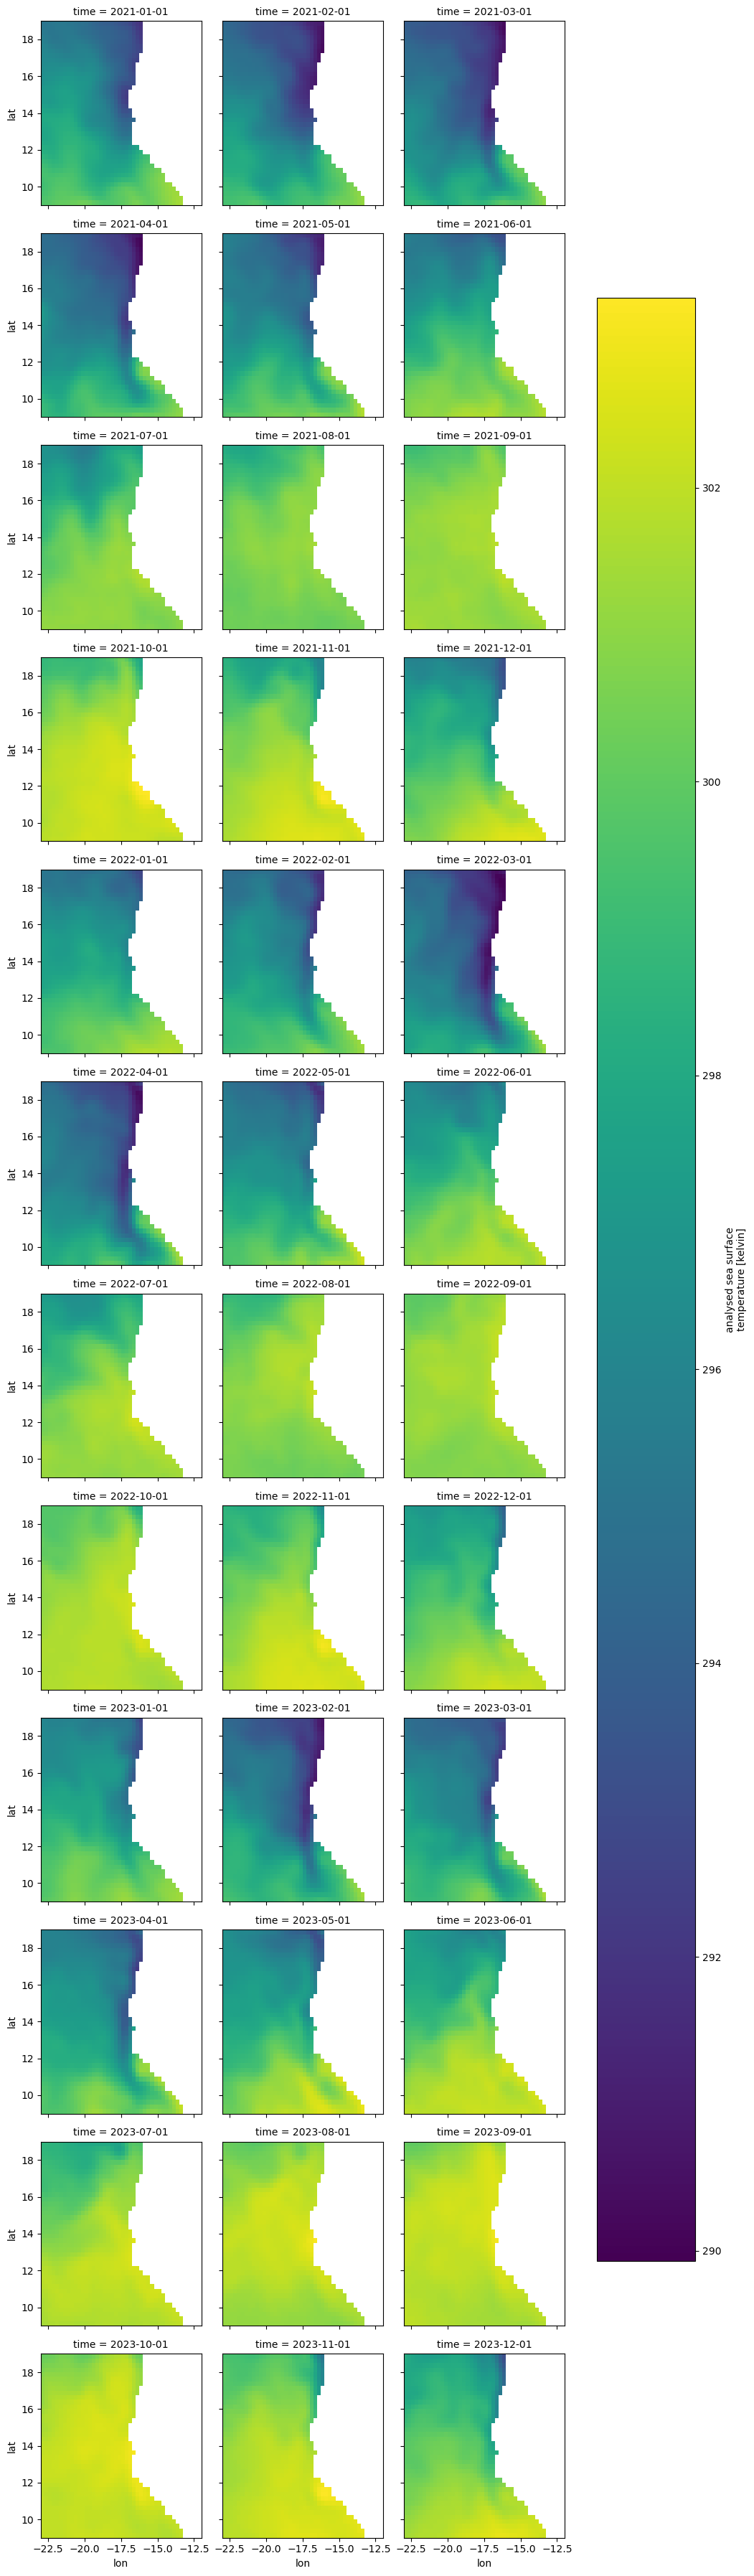

In [42]:
dc_monthly.plot(x='lon', y='lat', col="time", col_wrap=3);

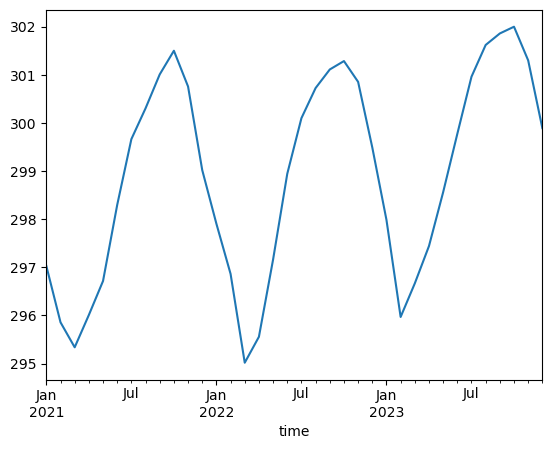

In [43]:
dc_monthly.mean(dim=['lat', 'lon']).to_pandas().plot();

## References

* [An Introduction to Earth and Environmental Data Science](https://earth-env-data-science.github.io)
* [xarray user guide](https://docs.xarray.dev/en/stable/user-guide/index.html)